In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import pandas as pd
import joblib

In [73]:
df = pd.read_csv("../data/cleaned_compliance_data_scaled.csv")

# -------------------------
# 2️⃣ Split into features & target
# -------------------------
target_col = "Perfect_Waste_Decomposition_System"
X = df.drop(columns=[target_col])
y = df[target_col]

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

In [75]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred, zero_division=0),
        "F1-Score": f1_score(y_test, y_pred, zero_division=0)
    })

# Convert results to DataFrame for easy comparison
results_df = pd.DataFrame(results).sort_values(by="F1-Score", ascending=False)
display(results_df)

,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest,1.0000,1.0,1.000000,1.000000
1,Gradient Boosting,1.0000,1.0,1.000000,1.000000
2,AdaBoost,1.0000,1.0,1.000000,1.000000
3,Logistic Regression,1.0000,1.0,1.000000,1.000000
4,Decision Tree,0.9975,1.0,0.995215,0.997602


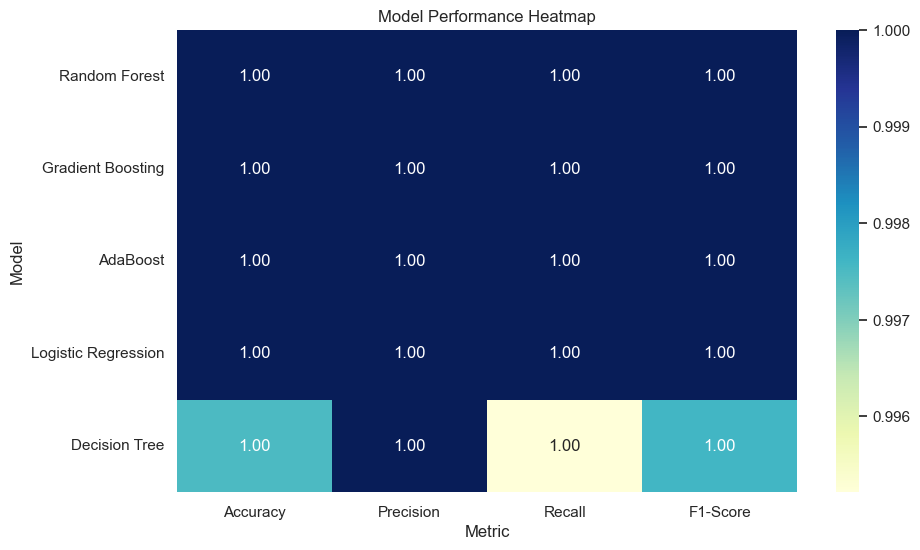

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the index to model names and drop the 'Model' column
heatmap_df = results_df.set_index("Model")

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_df, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
plt.title("Model Performance Heatmap")
plt.ylabel("Model")
plt.xlabel("Metric")
plt.show()


In [77]:
best_model_name = results_df.iloc[0]["Model"]
best_model = models[best_model_name]
print(f"\n🏆 Best Model: {best_model_name}")



🏆 Best Model: Random Forest


In [78]:
joblib.dump(best_model, "../models/waste_compliance_best_model.pkl")
print("✅ Best model saved: waste_compliance_best_model.pkl")

✅ Best model saved: waste_compliance_best_model.pkl
